<a href="https://colab.research.google.com/github/Thayer-ENGS108/Assignment_2_Fall2022/blob/main/assignment_2_Fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENGS 108 Fall 2022 Assignment 2**

*Due September 30, 2022 at 11:59PM on Github*

**Instructors:** George Cybenko

**TAs:** Chase Yakaboski and Clement Nyanhongo


---

## **Rules and Requirements**


1.   You are only allowed to use Python packages that are explicity imported in 
the assignment notebook or are standard (bultin) python libraries like random, os, sys, etc, (Standard Bultin Python libraries will have a Python.org documentation). For this assignment you may use:
  *   [numpy](https://numpy.org/doc/stable/)
  *   [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
  *   [scikit-learn](https://scikit-learn.org/stable/)
  *   [matplotlib](https://matplotlib.org/)

2.   All code must be fit into the designated code or text blocks in the assignment notebook. They are indentified by a **TODO** qualifier.

3. For analytical questions that don't require code, type your answer cleanly in Markdown. For help, see the [Google Colab Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb).

---


In [1]:
''' Import Statements '''
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.linear_model import LinearRegression
from scipy import signal
import matplotlib.collections as collections




# **Data Loading**
Upload the red and synthetic datasets to your google colab session using Google Drive. Read the following [tutorial](https://github.com/Thayer-ENGS108/Assignment_2_Fall2022) for how to get setup. 

In [2]:
#TODO: Set your base datasets path. This is my base path, you will need to change to match yours. 
dataset_base_path = 'datasets/'

In [3]:
#-- Everything else you should not need to change.
import os
import pickle

#-- Gather paths
synth_data_path = os.path.join(dataset_base_path, 'assign_2_synth_data.pk')
red_train_path = os.path.join(dataset_base_path, 'red_train.csv')
red_valid_path = os.path.join(dataset_base_path, 'red_valid.csv')
red_test_path = os.path.join(dataset_base_path, 'red_test.csv')
synth_train_path = os.path.join(dataset_base_path, 'synth_train.csv')
synth_valid_path = os.path.join(dataset_base_path, 'synth_valid.csv')
synth_test_path = os.path.join(dataset_base_path, 'synth_test.csv')

#-- Load Synth_Data
with open(synth_data_path, 'rb') as f_:
  synth_data = pickle.load(f_)

#-- Load Red Wine Data
red_train_df = pd.read_csv(red_train_path)
red_valid_df = pd.read_csv(red_valid_path)
red_test_df = pd.read_csv(red_test_path)
synth_train_df = pd.read_csv(synth_train_path)
synth_valid_df = pd.read_csv(synth_valid_path)
synth_test_df = pd.read_csv(synth_test_path)

#-- Data is stored in a tuple of format (X, y) and are already converted to numpy arrays.
red_train = (red_train_df.drop('quality', axis=1).to_numpy(), red_train_df['quality'].to_numpy())
red_valid = (red_valid_df.drop('quality', axis=1).to_numpy(), red_valid_df['quality'].to_numpy())
red_test = (red_test_df.drop('quality', axis=1).to_numpy(), red_test_df['quality'].to_numpy())

#-- Load in Synth train, valid, test data with tuple format (X, y)
synth_train = (synth_train_df.drop('y', axis=1).to_numpy(), synth_train_df['y'].to_numpy())
synth_valid = (synth_valid_df.drop('y', axis=1).to_numpy(), synth_valid_df['y'].to_numpy())
synth_test = (synth_test_df.drop('y', axis=1).to_numpy(), synth_test_df['y'].to_numpy())

## **Problem 1: $K$-Means Clustering**
In this problem, you will solve a clustering
task using the k-means algorithm and an associated classification task using $k$ nearest neighbors algorithm, both of which you learned in class. The dataset for this problem is a synthetic two-dimensional dataset *synth_data*. Each entry has two features $(x_1, x_2)$.
>
> **Part 1** A reasonable first step in every machine learning task is to understand the dataset at hand. Proceed to explore this problem’s dataset by addressing the following:
>> **(a)** Choose a suitable type of plot and visualize the training data.

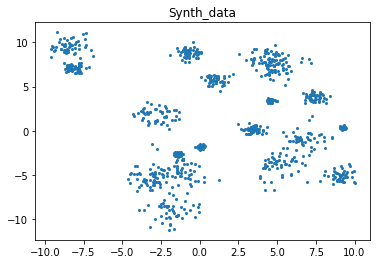

In [273]:
data1 = synth_data
plt.scatter(data1[:,0], data1[:,1], s=4)
plt.title("Synth_data");

>> **(b)** From your plot, how many clusters, $k$, would you estimate are represented in the dataset?

# I estimate about 17 clusters are respresented in the dataset


> **Part 2** Build a model.
>> **(a)** Using the k-Means algorithm, implement a clustering model. *Hint: Use [scikit-learn's K-means library](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).*

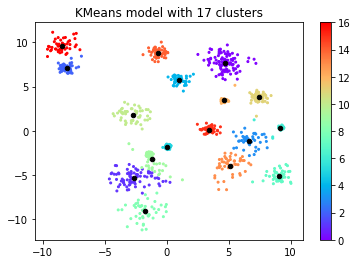

In [269]:
#TODO: Write your code here. Hint: Just define a model, don't train yet.

data1 = synth_data
kmeans = KMeans(n_clusters=17, n_init=50, max_iter=300, tol=0.00001).fit(data1)


plt.scatter(data1[:,0], data1[:,1], c= kmeans.labels_, s=4, cmap = "rainbow")
plt.colorbar()
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=20, c = "black")
plt.title("KMeans model with 17 clusters");

#Cluster centers in black

>> **(b)** Train the clustering model on several reasonable values of $k$, taking into account your visual inspection from 1b. Plot the sum of distance (SSE) from each data point and its respective cluster for 10 different values of $k$.

In [256]:
def train(k, dataset):
    model = KMeans(n_clusters=k, n_init=50, max_iter=10000, tol=0.00001).fit(dataset)
    return model


In [257]:
def calculateSSE(model):
    sse = model.inertia_

    return sse

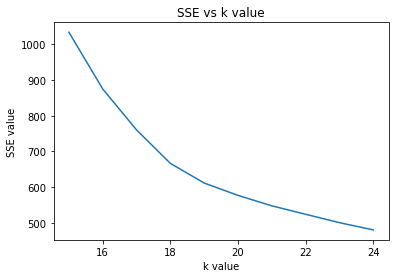

In [270]:
kinitial= 15
kfinal = 25
kvalues = np.arange(kinitial,kfinal)

i = 0
ssearray = np.zeros(kfinal-kinitial)

while i+kinitial < kfinal:
    ssearray[i]= calculateSSE(train(i+kinitial,data1))
    i= i+1
    
plt.plot(kvalues, ssearray)
plt.title("SSE vs k value")
plt.xlabel('k value')
plt.ylabel('SSE value');

>> **(c)** What value of $k$ is optimal? How does it compare to your visual inspection?



# B) The elbow in the curve of SSE vs k shows that the optimal k value is 18, which is close to the value of 17 I predicted from visual inspection.



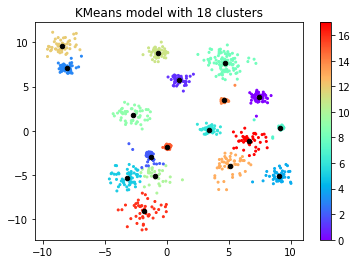

In [271]:
kmeans = KMeans(n_clusters=18, n_init=50, max_iter=300, tol=0.00001).fit(data1)


plt.scatter(data1[:,0], data1[:,1], c= kmeans.labels_, s=4, cmap = "rainbow")
plt.colorbar()
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=20, c = "black")
plt.title("KMeans model with 18 clusters");


# **Problem 2: $k$-NN Classification**
In this problem, you will utilize data deriving
from the same synthetic dataset as above. This time, the data has been separated into *synth_train*, *synth_valid* and *synth_test* arrays. Furthermore, each sample now includes a class label found in the $y$ column. These class labels come from the set $\{1, 2, . . . , 31\}$. *Note: These are not the same datasets as Problem 1.* 

> **Part 1** Train an implementation of the $k$-Nearest Neighbors algorithm on the training dataset. Note that $k$ here refers to the number of neighbors, not clusters.

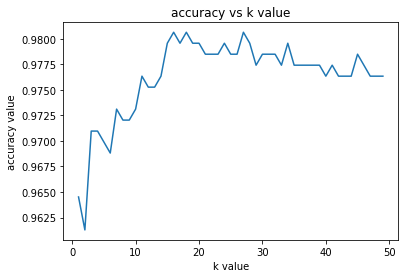

In [423]:
stra= np.concatenate([synth_train[0],synth_train[1].reshape(-1,1)], axis=1)
stest = np.concatenate([synth_test[0],synth_test[1].reshape(-1,1)], axis=1)

def train(k, dataset):
    model = KNeighborsClassifier(n_neighbors=k).fit(dataset[:,:2], dataset[:,-1])
    
    return model


kinitial= 1
kfinal = 50
kvalues = np.arange(kinitial,kfinal)

i = 0
accuracy_array = np.zeros(kfinal-kinitial)

while i+kinitial < kfinal:
    n = train(i+kinitial,stra)
    out = n.predict(stest[:,:2]).flatten()
    accuracy_array[i] = np.sum(out == stest[:,-1]).flatten()/len(out)
    i= i+1
    
plt.plot(kvalues, accuracy_array)
plt.title("accuracy vs k value")

plt.xlabel('k value')
plt.ylabel('accuracy value');

> **Part 2** Report the classification accuracy of this model on the validation set for different values for $k$. Plot these accuracies against $k$ and report the optimal value for $k$.

In [428]:
print(np.max(accuracy_array))
np.argmax(accuracy_array)



0.9806451612903225


15

# The optimal k value is 15, having the highest accuracy of ~98%

> **Part 3** Report the classification precision, recall and F1-score of this model on the data in synth test.csv using the optimal value of $k$ that you found in Part 2.

In [502]:
prf[1]

array([1.        , 1.        , 0.97222222, 0.95      , 0.93548387,
       1.        , 1.        , 0.9       , 1.        , 0.96551724,
       1.        , 0.96875   , 0.96153846, 1.        , 1.        ,
       1.        , 1.        , 0.96875   , 0.95652174, 1.        ,
       0.96774194, 1.        , 0.96774194, 0.94117647, 1.        ,
       0.92      , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [532]:
#TODO: Write your code here.
model = train(18, stra)
out = model.predict(stest[:,:2]).flatten()


from sklearn.metrics import precision_recall_fscore_support

prf = precision_recall_fscore_support(stest[:,-1],out)
i = 0
while i < 31:
    print("Precision for cluster",i+1,':',np.around(prf[0][i],3), '   ',"Recall for cluster",i+1,':',np.around(prf[1][i],3),  '   ',"F1 for cluster",i+1,':',np.around(prf[2][i],3))
    i=i+1

Precision for cluster 1 : 1.0     Recall for cluster 1 : 1.0     F1 for cluster 1 : 1.0
Precision for cluster 2 : 0.964     Recall for cluster 2 : 1.0     F1 for cluster 2 : 0.982
Precision for cluster 3 : 0.972     Recall for cluster 3 : 0.972     F1 for cluster 3 : 0.972
Precision for cluster 4 : 0.95     Recall for cluster 4 : 0.95     F1 for cluster 4 : 0.95
Precision for cluster 5 : 0.967     Recall for cluster 5 : 0.935     F1 for cluster 5 : 0.951
Precision for cluster 6 : 1.0     Recall for cluster 6 : 1.0     F1 for cluster 6 : 1.0
Precision for cluster 7 : 1.0     Recall for cluster 7 : 1.0     F1 for cluster 7 : 1.0
Precision for cluster 8 : 0.947     Recall for cluster 8 : 0.9     F1 for cluster 8 : 0.923
Precision for cluster 9 : 1.0     Recall for cluster 9 : 1.0     F1 for cluster 9 : 1.0
Precision for cluster 10 : 0.933     Recall for cluster 10 : 0.966     F1 for cluster 10 : 0.949
Precision for cluster 11 : 1.0     Recall for cluster 11 : 1.0     F1 for cluster 11 : 1

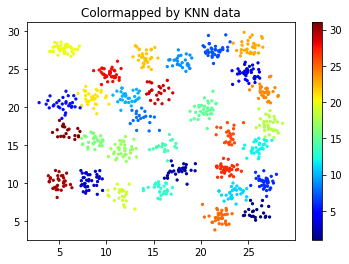

In [534]:
plt.scatter(stest.T[0],stest.T[1], c = out, s = 5, cmap = 'jet')
plt.colorbar()
plt.title('Colormapped by KNN data');

# **Problem 3: Decision Tree Classification**
In this problem you will use decision
trees to classify the quality of red vinho verde wine samples based on their physicochemical properties. The dataset has been separated into *red_train, red_valid and red_test* arrays. For all of these files, the rightmost column (“quality”) is the target label for each datapoint. All other columns are features.

> **Part 1** First let’s explore the datasets through the following exercises. Note that we cannot plot the data in a meaningful way given that number of features exceed the physical dimensions.

>> **(a)** How many datapoints are in the training, validation, and testing sets?

In [579]:
redtrain = np.concatenate([red_train[0],red_train[1].reshape(-1,1)], axis=1)
redvalid = np.concatenate([red_valid[0],red_valid[1].reshape(-1,1)], axis=1)
redtest = np.concatenate([red_test[0],red_test[1].reshape(-1,1)], axis=1)

print(redtrain.shape,redvalid.shape,redtest.shape)
print("red_train has", 895*12,'datapoints.','redvalid has',224*12,"datapoints.",'redtest has', 480*12,'datapoints.')

(895, 12) (224, 12) (480, 12)
red_train has 10740 datapoints. redvalid has 2688 datapoints. redtest has 5760 datapoints.


>> **(b)** How many features are available for each datapoint?

# There are 12 features. 

>> **(c)** What are the average *alcohol* and *pH* values for *training* samples?

In [589]:
print('The average alcohol values for the training samples is',np.average(redtrain[:,10]))
print('The average ph values for the training samples is',np.average(redtrain[:,8]))

The average alcohol values for the training samples are 10.397951582867744
The average ph values for the training samples are 3.309541899441341


> **Part 2** Decision Trees.

>> **(a)** Implement a binary decision tree model for the training data. *Hint: Try looking at the [scikit-learn decision tree library](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier).*

In [705]:
from sklearn.tree import DecisionTreeClassifier

def train(dataset, max_dep=None):
    model = DecisionTreeClassifier(random_state=0, max_depth = max_dep).fit(dataset[:,:-1],dataset[:,-1].reshape(-1,1))
    return model

model = train(redtrain)
quality_predict = model.predict(redtest[:,:-1])

accuracy = np.sum(redtest_quality==redtest[:,-1])/len(a)
accuracy

0.5895833333333333

>> **(b)** There are a number of hyperparameters that can be tuned to improve your model, one of which is the criteria for ending the splitting process. Two common ways of terminating the splitting process are *maximum depth* of the tree or *minimum number of samples* left. Tune the *maximum depth* of the tree by reporting the accuracy of the classifier in 2a on the validation set for different settings of *maximum depth*. Plot your findings.

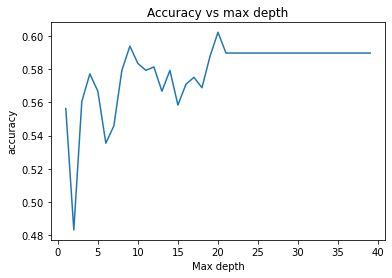

In [718]:
depth_initial=1
depth_final=40
i = 0
accuracy = np.zeros(depth_final - depth_initial)
depth_values = np.arange(depth_initial , depth_final)

while (i+depth_initial) < depth_final:
    model = train(redtrain , i + depth_initial)
    quality_predict = model.predict(redtest[:,:-1])
    accuracy[i] = np.sum(quality_predict == redtest[:,-1])/len(quality_predict)
    i=i+1

plt.plot(depth_values, accuracy)
plt.title('Accuracy vs max depth')
plt.xlabel('Max depth')
plt.ylabel('accuracy');


In [719]:
np.argmax(accuracy)

19

# The optimal max depth value is 19

>> **(c)** Use the optimum setting of *maximum depth* found in 2b to report the accuracy of the classifier on the *test* dataset.

In [721]:
print('The accuracy at a max depth of 19 is', np.max(accuracy))


The accuracy at a max depth of 19 is 0.6020833333333333


# **Problem 4: Systems - Estimating ODE Parameters**

Many real-world systems can be modelled by linear diffferential equations. Some of the most common examples are mechanical and electrical oscillations (see mass-spring example below) which can be described by the solution of an initial value problem of the form:

$$𝑎𝑥″+𝑏𝑥′+𝑐𝑥=𝑔(𝑡)  \tag{1}$$    

, where initial condition are given by:       $𝑥(0)=𝑥0$,   $𝑥′(0)=𝑥′0$                    
 
For our problems, we will assume that $g(t) = 0$, no external force (for spring system etc)

![Url](https://benmoseley.blog/wp-content/uploads/2021/08/oscillator.gif)


>**Part 1** Lets generate some synthetic data using an ODE for a vibration with no damping in chapter 3.7 Example 4 (Source: Elementary Differential Equations and Boundary Value Problems by Boyce & DiPrima, Wiley 2017).
In this system, $$ x'' + 0.125x' + x= 0 \tag{2}$$ 
and the analytical solution is the function below:


In [1096]:
t = np.linspace(0, 30*np.pi, 1000)   # time
x_funct = lambda t: (32/np.sqrt(255))*np.exp(-1*t/16)*np.cos((np.sqrt(255)/16)*t -0.06254)  # function to get x given t

# analytic function x given t 
x_analytic = x_funct(t)

>> **(a)** Now lets assume we have observed a noisy sample composed of the first 20% of x_analytic. Create noisy data for the first 20% of x_analytic

In [1097]:
# create t_noisy (time) to record time for the first 20% of t 
NOISY_FACTOR = 5 # controls the threshold for adding noise

len_t = int(0.2*len(t))
t_noisy = t[:len_t]

In [1098]:
# TODO: Compute x for the corresponding t_noisy
x = x_funct(t_noisy)


In [1099]:
# TODO: adding noise
noise = np.array(np.random.random(len_t) - 0.5)/NOISY_FACTOR
# x_noisy = ?? 
x_noisy= x+noise



>>**(b)** Our task in this question is to estimate parameters a, b, and c, assuming that we only observed x_noisy

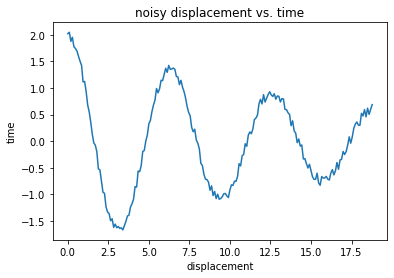

In [1100]:
# TODO: Plot the observed noisy data below (time vs displacement)
plt.plot(t_noisy, x_noisy)
plt.title('noisy displacement vs. time')
plt.xlabel('displacement')
plt.ylabel('time');

>> **(c)** Real-world data is often noisy and denoising can help to reduce the noise. Denoise the above data to create x_denoised:

In [1101]:
# denoising
N, Wn = 5, 0.04   # Feel free to modify N and Wn as you see fit!
b, a = signal.butter(N, Wn, analog=False)   # module from scipy
x_denoised = signal.filtfilt(b,a,x_noisy)

Text(0.5, 1.0, 'x_noisy & x_denoised vs time')

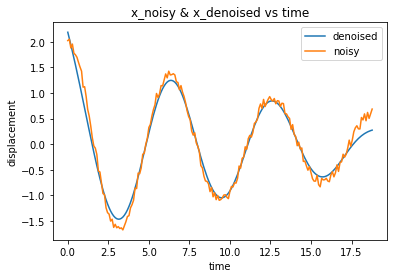

In [1102]:
# TODO: Plot and insert legend to differentiate x_noisy and x_denoised vs time (on same plot)
plt.plot( t_noisy, x_denoised, label = 'denoised')
plt.plot(t_noisy,x_noisy, label = 'noisy')
plt.legend(loc="upper right")
plt.ylabel('displacement')
plt.xlabel('time')
plt.title('x_noisy & x_denoised vs time')

**Part 2**: Compute derivatives x' and x'' to estimate a, b, and c given x

>>**a** Using the ([forward method (finite difference)](https://en.wikipedia.org/wiki/Finite_difference)).
compute $x'$ and $x''$ for both x_noisy and x_denoised

In [1103]:
#TODO: Complete the function below
def first_derivative(X, dt):
    # approximate derivative using forward nethod
    fd = (X[1:]-X[:-1])/dt
    return fd

a = first_derivative(x_noisy,t_noisy[2]-t_noisy[1])

In [1129]:
#TODO: Complete the functions below
def second_derivative(X_first, dt):
    # Basically differentiate the first derivative
    sd = np.zeros(len(X_first))
    for i in range(len(sd)-1):
        sd[i] = (X_first[i+1]-X_first[i])/dt
    return sd


dt = t_noisy[2]-t_noisy[1]
b = second_derivative(a,dt)

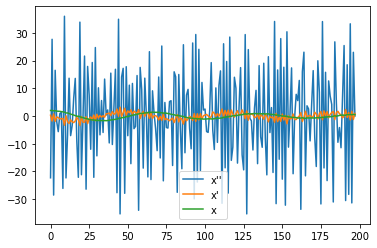

In [1130]:
plt.plot(b, label = "x''")
plt.plot(a, label = "x'")
plt.plot(x_noisy[:-2], label = "x")
plt.legend()

In [1131]:
def get_derivatives (X):
    dt = t[1] - t[0] # time difference
    X_prime =  first_derivative(deepcopy(X), dt)
    X_prime_squared = second_derivative(deepcopy(X_prime), dt) 
    # adjust to make equal lengths arrays
    return X[2:], X_prime, X_prime_squared
    
    
# for noisy data 
x, x_prime, x_prime_squared = get_derivatives(x_noisy)

# for denoised data
x1, x_prime1, x_prime_squared1 = get_derivatives(x_denoised)

In [1132]:
x_prime_squared.shape

(198,)

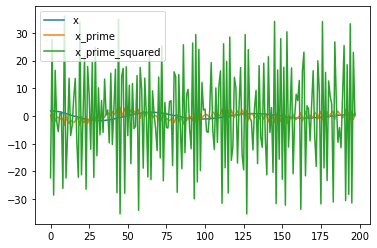

In [1133]:
# TO DO: Fill the function belwo

def plot_figs (x, x_first, x_second, labels):
    
    plt.plot(x, label = labels[0])
    plt.plot(x_first , label = labels[1])
    plt.plot(x_second, label = labels[2])
    plt.legend()
    
    
    #TD DO: On same graph, plot x, x', x''

plot_figs(x, x_prime, x_prime_squared, "x, x_prime, x_prime_squared".split(","))
 #   return; plot_figs(x, x_prime, x_prime_squared) plot_figs(x1, x_prime1, x_prime_squared1)

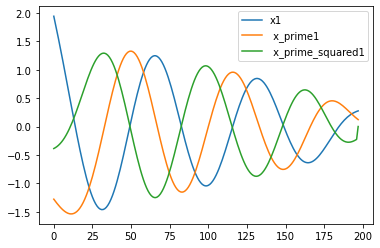

In [1134]:
plot_figs(x1, x_prime1, x_prime_squared1, "x1, x_prime1, x_prime_squared1".split(","))

>>**(b)** How do the derivative plots compare for the noisy vs the denoised samples? Whats the effect of denoising? What happens when we adjust the NOISY_FACTOR (see Part 1a)?

# The denoised derivative plot is much smoother than the noisy samples. The noise became more exaggerated with each derivative. The effect of denoising was smoothing out the curve. 

>>**(c)** Now we have x, x' and x''. Since g(t) = 0; we can estimate a, b, and c via regression. If we assume c = 1, 
then Equation 1 can be written as:
    
    
$$𝑎𝑥″+𝑏𝑥′ =  -x \tag{3}$$


>>>From Equation 3, we can perform [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to estimate parameters a and b. Using -x as your dependent variable, and x' and x'' as your independent variables. Train a regression model below:




In [1135]:
x_prime.shape

(198,)

In [1136]:
cat_noise = np.stack([x_prime, x_prime_squared, x], axis = 1)

In [1137]:
reg_noise = LinearRegression().fit(cat_noise[:,:2], cat_noise[:,-1])
trans_noise = reg_noise.predict(cat_noise[:,:2])

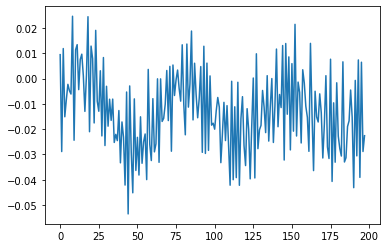

In [1138]:
plt.plot(trans_noise)

In [1139]:
#TODO: Fill the function below
from sklearn.linear_model import LinearRegression

def train_model (X, X_first, X_second):
    """ X - original x, X_first - first derivative, X_second - second derivative """
    reg = np.stack([X_first,X_second,-X],axis=1)
    model = LinearRegression().fit(reg[:,:2], reg[:,-1])
    # TODO: Using Equation 3 with independent variable, (X'' and X'), dependent variable (-X).
    #       Fit a linear regression model
    
    # return the regression coefficients and the model (which we will be a and b)
    return model.coef_, model.predict(reg[:,:2])

# train regression models for the noisy and denoised data
coeff_noisy  = train_model(x, x_prime, x_prime_squared)   # noisy data
coeff_denoised = train_model(x1, x_prime1, x_prime_squared1)   # denoised data

**Part 3**  From the model coefficients, we can identify parameters $a$ and $b$ and we know that $c = 1$. Now, our task is to 
predict how good our model can predict the entire dataset. 

In [1140]:
x_original = x_funct(t_noisy)
x_original, x_original_prime, x_original_prime_squared = get_derivatives(x_original)

coeff_original = train_model(x_original, x_original_prime, x_original_prime_squared)
a_noisy, b_noisy = coeff_noisy[0]
a_denoised, b_denoised = coeff_denoised[0] 

print('For the noisy sample: (a = {}, b = {}, c = 1)'.format(a_noisy, b_noisy))
print('For the denoised sample: (a = {}, b = {}, c = 1)'.format(a_denoised, b_denoised))
print("The analytic solution has (a = 1, b = 0.125, and c = 1)")
print(coeff_original[0])

For the noisy sample: (a = 0.009466224851379193, b = 0.0011645915756787134, c = 1)
For the denoised sample: (a = 0.15478770986824095, b = 1.0843191970926087, c = 1)
The analytic solution has (a = 1, b = 0.125, and c = 1)
[0.02981582 0.99776652]


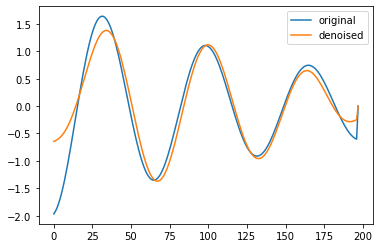

In [1141]:
plt.plot(coeff_original[1],label = 'original')
plt.plot(coeff_denoised[1], label = 'denoised')
plt.legend();

>>**(a)** How do estimated parameters from the noisy and denoised samples compare to the analytic parameters? 

# The estimated parameters were very similar for the denoised data compared to the analytic, with my a and b being switched. The noisy sample was very different from analytic, but the second derivative of the noisy data was very erratic. 

>> **(b)** From Equation 3, $$x = -1*(ax'' + bx') \tag{4}$$ 
We will use this equation to test how good our parameters predict the analytic solution (given x' and x'').

In [1142]:
x_analytic.shape


(1000,)

In [1143]:
# get derivatives on entire dataset 
X, X_prime, X_prime_squared = get_derivatives(x_analytic)

# TODO: Use Equation 3 to compute X
def compute_x (X_first, X_second, a, b):
    X = -((a*X_first)+(b*X_second))
    # Fill here
    return X

# TODO: Predict Y for the noisy sample, and the denoised sample 
x_pred_noisy = compute_x(X_prime, X_prime_squared, a_noisy, b_noisy)
x_pred_denoised  = compute_x(X_prime, X_prime_squared, a_denoised, b_denoised)



In [1144]:
X_prime.shape

(998,)

In [1145]:
x_pred_noisy.shape

(998,)

Text(0, 0.5, 'displacement')

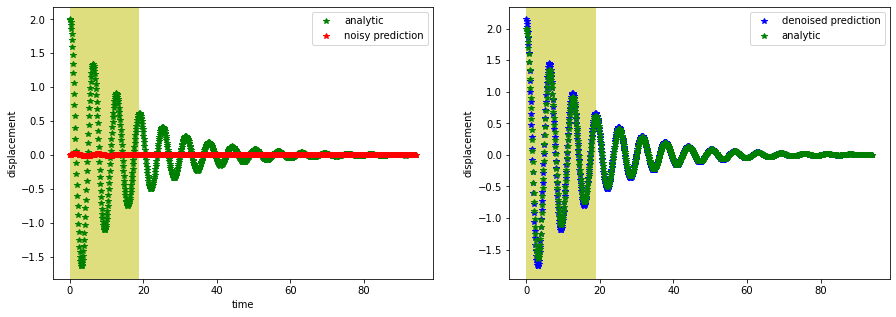

In [1146]:

# adjust t to fit dimensions of predictions 
LEN_T = len(t)
t_original = t[:LEN_T-2]
x_original = x_analytic[:LEN_T -2]


# Plots to show how well our parameters fit the data from the analytic solution
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
axes[0].plot(t_original, x_original, '*', color = 'green', label = 'analytic')
axes[0].plot(t_original, x_pred_noisy, '*', color = 'red', label = 'noisy prediction')

axes[1].plot(t_original, x_pred_denoised, '*', color = 'blue', label = 'denoised prediction')
axes[1].plot(t_original, x_original, '*', color = 'green', label = 'analytic')

axes[0].legend()
axes[1].legend()

# This shades the seen part (in creating the model -yellow), but the model
# extends to the unseen white part
axes[0].axvspan(0, t[len_t], color='y', alpha=0.5, lw=0)
axes[1].axvspan(0, t[len_t], color='y', alpha=0.5, lw=0)

axes[0].set_xlabel('time')
axes[0].set_ylabel('displacement')
axes[1].set_ylabel('time')
axes[1].set_ylabel('displacement')


>>**(c)** How do these two plots compare? On the same graph, plot the relative errors to compare how x_pred noisy and x_pred_denoised differ from x_original (if necessary, use a logarithmic scale). $$ RE(true, pred) =|true -pred|/|true|$$ What conclusion do you get from the relative errors?

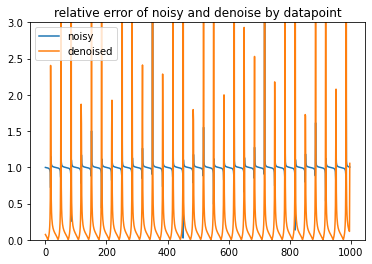

In [1175]:
acc_pred_noisy = abs((x_original-x_pred_noisy)/x_original)
acc_pred_denoised = abs((x_original - x_pred_denoised)/x_original)


plt.plot(acc_pred_noisy, label = 'noisy')
plt.plot(acc_pred_denoised, label = 'denoised')
plt.ylim([0,3])
plt.title('relative error of noisy and denoise by datapoint')
plt.legend();
    

In [1182]:
print(np.sum(acc_pred_noisy)/len(acc_pred_noisy), 'is RE of noisy')
print(np.sum(acc_pred_denoised)/len(acc_pred_denoised), ' is RE of denoised')
print(' The RE on average is lower for noisy data')

1.113961205786823 is RE of noisy
1.3359729818408266  is RE of denoised
 The RE on average is lower for noisy data


>>**(d)** In real-world scenarios, we often dont have x_analytic but only the noisy sample. How would you ensure if 
the parameters you obtained are good enough if you only have x_noisy?

# I would train it on only part of the dataset and see if the parameters would be able to predict the remaining datapoints.